| Device      | Name                      | Model         |
| :---        |           :----:          |          ---: |
| D1          | Xiaomi Redmi Note 10 Pro  |  M2101K6G     |
| D2          | Xiaomi Redmi 9            | M2004J19C     |
| D3          | Nokia 5.1 Plus            | -     |
| D4          |  Nokia 2.3                | -     |

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
horizontal_length = 16
vertical_length = 16
plt.figure(figsize=(horizontal_length, vertical_length))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

# open3feet

### D1 to D2

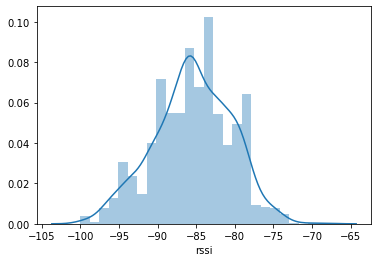

In [3]:
path_d1tod2 = './dataset/open3feet/hands/D1_to_D2.csv'
df_d1tod2 = pd.read_csv(path_d1tod2)
open3feet_d1tod2 = df_d1tod2['rssi']
sns.distplot(open3feet_d1tod2)
plt.show()

In [4]:
open3feet_d1tod2.shape

(1451,)

In [5]:
open3feet_d1tod2.median()

-85.0

### D2 to D1

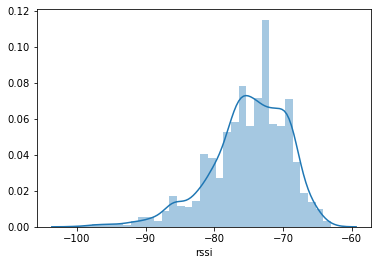

In [6]:
path_d2tod1 = './dataset/open3feet/hands/D2_to_D1.csv'
df_d2tod1 = pd.read_csv(path_d2tod1)
open3feet_d2tod1 = df_d2tod1['rssi']
sns.distplot(open3feet_d2tod1)
plt.show()

In [7]:
open3feet_d2tod1.shape

(1889,)

In [8]:
open3feet_d2tod1.median()

-74.0

### D3 to D4

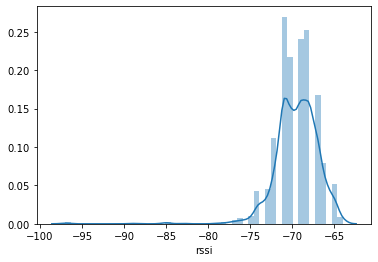

In [9]:
path_d3tod4 = './dataset/open3feet/floor/D3_to_D4.csv'
df_d3tod4 = pd.read_csv(path_d3tod4)
open3feet_d3tod4 = df_d3tod4['rssi']
sns.distplot(open3feet_d3tod4)
plt.show()

In [10]:
open3feet_d3tod4.shape

(1685,)

In [11]:
open3feet_d3tod4.median()

-69.0

### D4 to D3

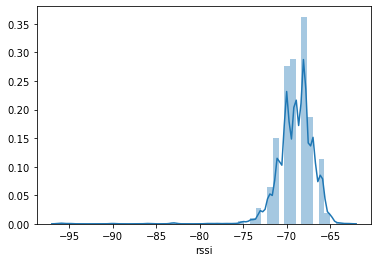

In [12]:
path_d4tod3 = './dataset/open3feet/floor/D4_to_D3.csv'
df_d4tod3 = pd.read_csv(path_d4tod3)
open3feet_d4tod3 = df_d4tod3['rssi']
sns.distplot(open3feet_d4tod3)
plt.show()

In [13]:
open3feet_d4tod3.shape

(2207,)

In [14]:
open3feet_d4tod3.median()

-69.0

# open9feet

### D1 to D2

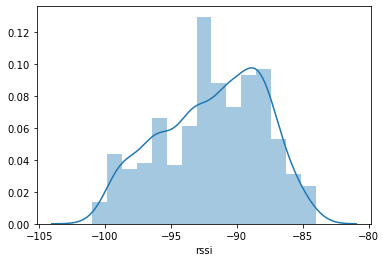

In [15]:
path_d1tod2 = './dataset/open9feet/hands/D1_to_D2.csv'
df_d1tod2 = pd.read_csv(path_d1tod2)
open9feet_d1tod2 = df_d1tod2['rssi']
sns.distplot(open9feet_d1tod2)
plt.show()

In [16]:
open9feet_d1tod2.shape

(1110,)

In [17]:
open9feet_d1tod2.median()

-91.0

### D2 to D1

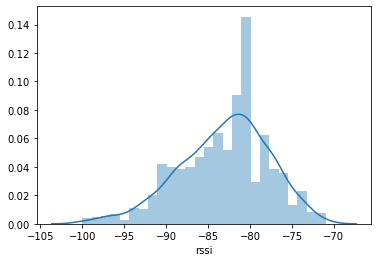

In [18]:
path_d2tod1 = './dataset/open9feet/hands/D2_to_D1.csv'
df_d2tod1 = pd.read_csv(path_d2tod1)
open9feet_d2tod1 = df_d2tod1['rssi']
sns.distplot(open9feet_d2tod1)
plt.show()

In [19]:
open9feet_d2tod1.shape

(1873,)

In [20]:
open9feet_d2tod1.median()

-82.0

### D3 to D4

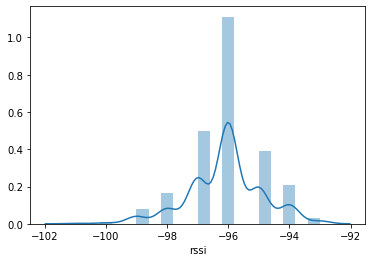

In [21]:
path_d3tod4 = './dataset/open9feet/floor/D3_to_D4.csv'
df_d3tod4 = pd.read_csv(path_d3tod4)
open9feet_d3tod4 = df_d3tod4['rssi']
sns.distplot(open9feet_d3tod4)
plt.show()

In [22]:
open9feet_d3tod4.shape

(954,)

In [23]:
open9feet_d3tod4.median()

-96.0

### D4 to D3

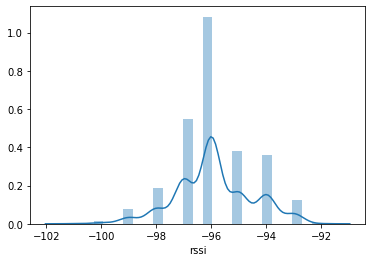

In [24]:
path_d4tod3 = './dataset/open9feet/floor/D4_to_D3.csv'
df_d4tod3 = pd.read_csv(path_d4tod3)
open9feet_d4tod3 = df_d4tod3['rssi']
sns.distplot(open9feet_d4tod3)
plt.show()

In [25]:
open9feet_d4tod3.shape

(1365,)

In [26]:
open9feet_d4tod3.median()

-96.0

# wall3feet

### D1 to D2

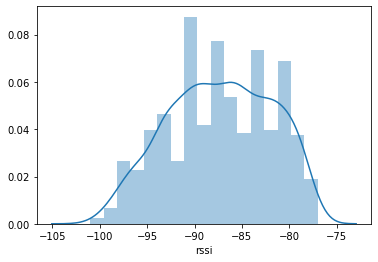

In [27]:
path_d1tod2_w = './dataset/wall3feet/hands/D1_to_D2.csv'
df_d1tod2_w = pd.read_csv(path_d1tod2_w)
wall3feet_d1tod2 = df_d1tod2_w['rssi']
sns.distplot(wall3feet_d1tod2)
plt.show()

In [28]:
wall3feet_d1tod2.shape

(1359,)

In [29]:
wall3feet_d1tod2.median()

-87.0

### D2 to D1

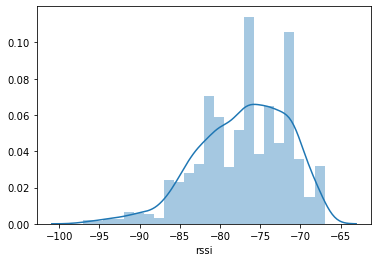

In [30]:
path_d2tod1_w = './dataset/wall3feet/hands/D2_to_D1.csv'
df_d2tod1_w = pd.read_csv(path_d2tod1_w)
wall3feet_d2tod1 = df_d2tod1_w['rssi']
sns.distplot(wall3feet_d2tod1)
plt.show()

In [31]:
wall3feet_d2tod1.shape

(1850,)

In [32]:
wall3feet_d2tod1.median()

-77.0

### D3 to D4

### D4 to D3

# wall9feet

### D1 to D2

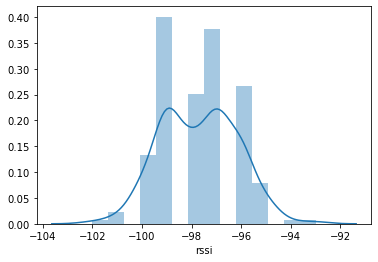

In [33]:
path_d1tod2 = './dataset/wall9feet/hands/D1_to_D2.csv'
df_d1tod2 = pd.read_csv(path_d1tod2)
wall9feet_d1tod2 = df_d1tod2['rssi']
sns.distplot(wall9feet_d1tod2)
plt.show()

In [34]:
wall9feet_d1tod2.shape

(198,)

In [35]:
wall9feet_d1tod2.median()

-98.0

### D2 to D1

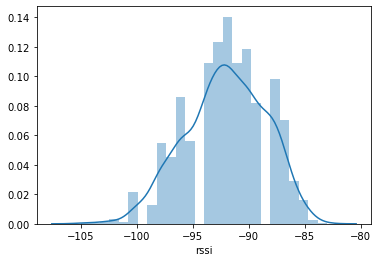

In [36]:
path_d2tod1 = './dataset/wall9feet/hands/D2_to_D1.csv'
df_d2tod1 = pd.read_csv(path_d2tod1)
wall9feet_d2tod1 = df_d2tod1['rssi']
sns.distplot(wall9feet_d2tod1)
plt.show()

In [37]:
wall9feet_d2tod1.shape

(1558,)

In [38]:
wall9feet_d2tod1.median()

-92.0

### D3 to D4

### D4 to D3

# Prepare Dataset

### open3feet

In [39]:
dataset_open3feet = pd.DataFrame()
dataset_open3feet['rssi'] = open3feet_d1tod2
dataset_open3feet['target'] = 1

In [40]:
temp = pd.DataFrame()
temp['rssi'] = open3feet_d2tod1
temp['target'] = 1

In [41]:
dataset_open3feet = dataset_open3feet.append(temp)
dataset_open3feet.reset_index(drop=True, inplace=True)

In [42]:
dataset_open3feet

,rssi,target
0,-96,1
1,-95,1
2,-84,1
3,-85,1
4,-94,1
...,...,...
3335,-71,1
3336,-70,1
3337,-70,1
3338,-70,1


### open9feet

In [43]:
dataset_open9feet = pd.DataFrame()
dataset_open9feet['rssi'] = open9feet_d1tod2
dataset_open9feet['target'] = 0

In [44]:
temp = pd.DataFrame()
temp['rssi'] = open9feet_d2tod1
temp['target'] = 0

In [45]:
dataset_open9feet = dataset_open9feet.append(temp)
dataset_open9feet.reset_index(drop=True, inplace=True)

In [46]:
dataset_open9feet

,rssi,target
0,-99,0
1,-87,0
2,-87,0
3,-86,0
4,-90,0
...,...,...
2978,-80,0
2979,-80,0
2980,-80,0
2981,-81,0


### wall3feet

In [47]:
dataset_wall3feet = pd.DataFrame()
dataset_wall3feet['rssi'] = wall3feet_d1tod2
dataset_wall3feet['target'] = 0

In [48]:
temp = pd.DataFrame()
temp['rssi'] = wall3feet_d2tod1
temp['target'] = 0

In [49]:
dataset_wall3feet = dataset_wall3feet.append(temp)
dataset_wall3feet.reset_index(drop=True, inplace=True)

In [50]:
dataset_wall3feet

,rssi,target
0,-91,0
1,-91,0
2,-91,0
3,-98,0
4,-84,0
...,...,...
3204,-78,0
3205,-82,0
3206,-88,0
3207,-86,0


### wall9feet

In [51]:
dataset_wall9feet = pd.DataFrame()
dataset_wall9feet['rssi'] = wall9feet_d1tod2
dataset_wall9feet['target'] = 0

In [52]:
temp = pd.DataFrame()
temp['rssi'] = wall9feet_d2tod1
temp['target'] = 0

In [53]:
dataset_wall9feet = dataset_wall9feet.append(temp)
dataset_wall9feet.reset_index(drop=True, inplace=True)

In [54]:
dataset_wall9feet

,rssi,target
0,-99,0
1,-93,0
2,-100,0
3,-97,0
4,-101,0
...,...,...
1751,-91,0
1752,-91,0
1753,-90,0
1754,-92,0


In [55]:
dataset = dataset_open3feet.append(dataset_open9feet)
dataset = dataset.append(dataset_wall3feet)
dataset = dataset.append(dataset_wall9feet)
dataset.reset_index(drop=True, inplace=True)

In [56]:
dataset

,rssi,target
0,-96,1
1,-95,1
2,-84,1
3,-85,1
4,-94,1
...,...,...
11283,-91,0
11284,-91,0
11285,-90,0
11286,-92,0


In [57]:
dataset = shuffle(dataset)
dataset.reset_index(drop=True, inplace=True)

In [58]:
dataset

,rssi,target
0,-91,0
1,-81,0
2,-87,0
3,-82,1
4,-90,0
...,...,...
11283,-96,0
11284,-80,0
11285,-78,1
11286,-102,0


In [59]:
dataset.to_csv("rssi_dataset_2.csv")